SOURCE : [URL](https://dacon.io/competitions/open/235594/data)

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
df_train = pd.read_csv('../data/fashion_mnist/train.csv')
df_test = pd.read_csv('../data/fashion_mnist/test.csv')

print(df_train.shape,df_test.shape)

(60000, 786) (10000, 785)


In [29]:
df_train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, index to pixel784
dtypes: int64(786)
memory usage: 359.8 MB


In [31]:
df_test.head()

,index,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, index to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [33]:
na_sum = df_train.isna().sum()
na_sum[na_sum !=0]

Series([], dtype: int64)

In [34]:
na_sum = df_test.isna().sum()
na_sum[na_sum !=0]

Series([], dtype: int64)

In [35]:
sorted(df_train['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [36]:
X = df_train[df_train.columns.difference(['index','label'])].values.reshape((-1,28,28))
y = df_train['label']
test = df_test[df_test.columns.difference(['index'])].values.reshape((-1,28,28))

print(X.shape)
print(y.shape)
print(test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


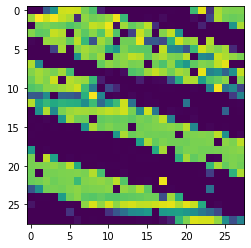

In [37]:
plt.imshow(test[0])

In [38]:
X = X / 255
test = test / 255

In [39]:
# for color
X = np.expand_dims(X,axis=-1)
test = np.expand_dims(test,axis=-1)

print(X.shape)
print(test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,shuffle=True,random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


In [41]:
# MLP
model = Sequential()

model.add(Flatten(input_shape=[28,28]))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train,y_train,batch_size=64,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5799 - acc: 0.8015 - val_loss: 0.4578 - val_acc: 0.8371
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4280 - acc: 0.8501 - val_loss: 0.4084 - val_acc: 0.8526
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3866 - acc: 0.8634 - val_loss: 0.3699 - val_acc: 0.8675
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3617 - acc: 0.8711 - val_loss: 0.3809 - val_acc: 0.8668
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3442 - acc: 0.8776 - val_loss: 0.3990 - val_acc: 0.8533
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3275 - acc: 0.8828 - val_loss: 0.3516 - val_acc: 0.8719
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3134 - acc: 0.8872 - val_loss: 0.3293 - val_acc: 0.8802
Epoch 8/20
750/750 [==============================] - 2s 2ms/step - loss: 0.

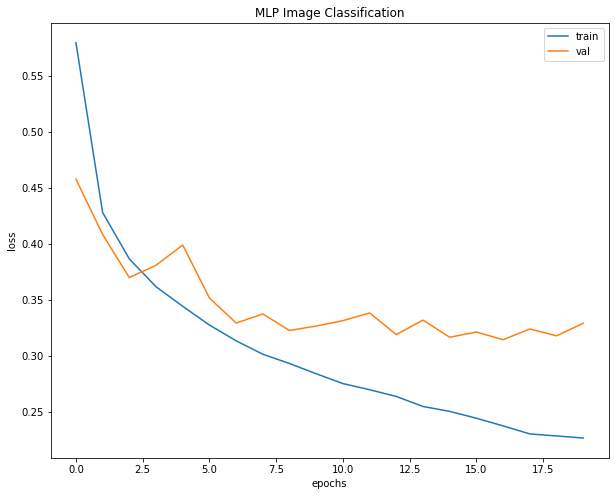

In [43]:
f = plt.figure(figsize=(10,8))

plt.plot(range(20),model.history.history['loss'][:20],label='train')
plt.plot(range(20),model.history.history['val_loss'][:20],label='val')

f.patch.set_facecolor('white')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('MLP Image Classification')
plt.show()

In [44]:
# CNN
model = Sequential()

model.add(Conv2D(kernel_size=(3,3),filters=16,input_shape=[28,28,1],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                173120    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
________________________________________________

In [45]:
model.fit(X_train,y_train,batch_size=64,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
750/750 [==============================] - 6s 4ms/step - loss: 0.5447 - acc: 0.8096 - val_loss: 0.3946 - val_acc: 0.8600
Epoch 2/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3776 - acc: 0.8679 - val_loss: 0.3762 - val_acc: 0.8668
Epoch 3/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3372 - acc: 0.8809 - val_loss: 0.3295 - val_acc: 0.8803
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3114 - acc: 0.8895 - val_loss: 0.3130 - val_acc: 0.8873
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2904 - acc: 0.8952 - val_loss: 0.3223 - val_acc: 0.8826
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2738 - acc: 0.9013 - val_loss: 0.2950 - val_acc: 0.8912
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2577 - acc: 0.9064 - val_loss: 0.2972 - val_acc: 0.8902
Epoch 8/20
750/750 [==============================] - 2s 3ms/step - loss: 0.

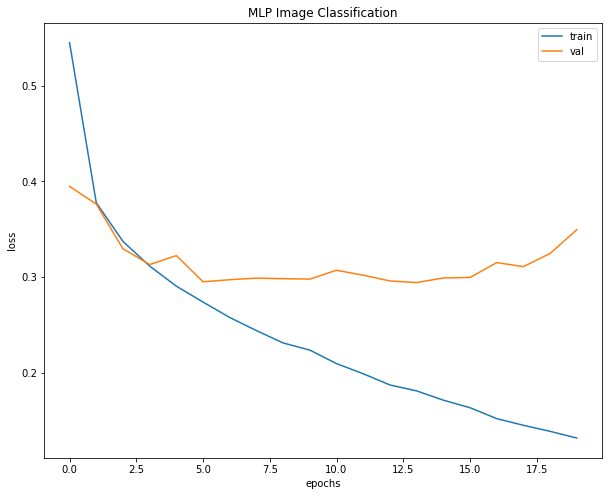

In [46]:
f = plt.figure(figsize=(10,8))

plt.plot(range(20),model.history.history['loss'][:20],label='train')
plt.plot(range(20),model.history.history['val_loss'][:20],label='val')

f.patch.set_facecolor('white')

plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('MLP Image Classification')
plt.show()

In [52]:
# fixed CNN(prevent overfitting)
model = Sequential()

model.add(Conv2D(kernel_size=(3,3),filters=16,input_shape=[28,28,1],activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                173120    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                      

In [53]:
early_stop = EarlyStopping(patience=10,monitor='val_loss')
model.fit(X_train,y_train,batch_size=64,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 0.7460 - acc: 0.7397 - val_loss: 0.4326 - val_acc: 0.8367
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.5163 - acc: 0.8184 - val_loss: 0.3810 - val_acc: 0.8614
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4655 - acc: 0.8354 - val_loss: 0.3555 - val_acc: 0.8712
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4378 - acc: 0.8449 - val_loss: 0.3365 - val_acc: 0.8764
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4156 - acc: 0.8521 - val_loss: 0.3263 - val_acc: 0.8817
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.3975 - acc: 0.8589 - val_loss: 0.3247 - val_acc: 0.8790
Epoch 7/100
750/750 [==============================] - 3s 3ms/step - loss: 0.3776 - acc: 0.8648 - val_loss: 0.3192 - val_acc: 0.8821
Epoch 8/100
750/750 [==============================] - 3s 3ms/step - 

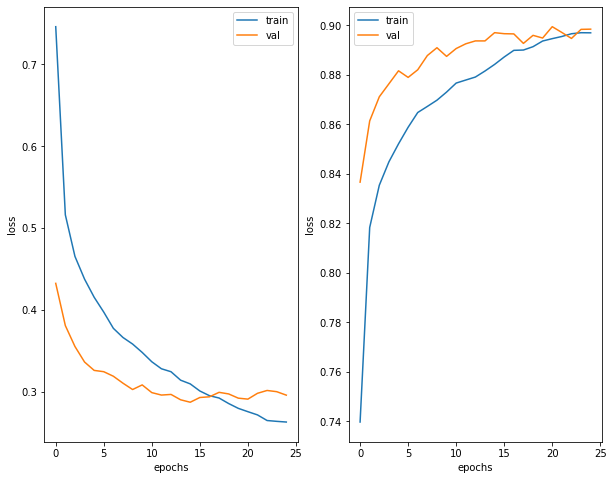

In [69]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,8))

fig.patch.set_facecolor('white')

rn = range(25)
to = 25

for i,t in enumerate(['loss','acc']):    
    axes[i].plot(rn,model.history.history[t][:to],label='train')
    axes[i].plot(rn,model.history.history['_'.join(['val',t])][:to],label='val')
    axes[i].set_xlabel('epochs')
    axes[i].set_ylabel('loss')
    axes[i].legend()
    
plt.show()

In [78]:
y_pred = np.argmax(model.predict(test),axis=-1)
y_pred

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

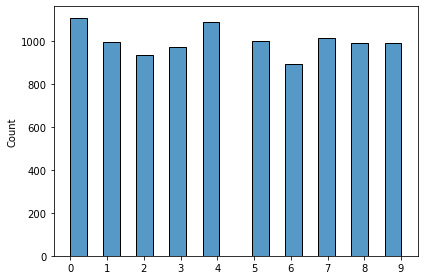

In [79]:
sns.histplot(x=y_pred)
plt.xticks(np.arange(0,10))
plt.tight_layout()